### Task

In [1]:
from zlib import crc32
import numpy as np

types = ['regression', 'classification']
datasets = {'regression': [{'name': 'Servo Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Servo'}, 
                           {'name': 'Forest Fires Data Set',
                            'url': 'https://archive.ics.uci.edu/ml/datasets/Forest+Fires'},
                           {'name': 'Boston Housing Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston'}, 
                           {'name': 'Diabetes Data Set',
                            'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes'}],
            'classification': [{'name': 'Spambase Data Set',
                                'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'}, 
                               {'name': 'Wine Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine'}, 
                               {'name': 'Breast Cancer Data Set',
                                'url': 'https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer'}, 
                               {'name': 'MNIST',
                                'url': 'http://yann.lecun.com/exdb/mnist/'}]}
methods = {'regression': ['Линейная регрессия', 
                          'Нейронная сеть (Перцептрон)', 
                          'Надарая-Ватсона',
                          'SVR'],
           'classification': ['Логистическая регрессия', 
                              'Нейронная сеть (Перцептрон)', 
                              'k-ближайших соседей',
                              'Метод потенциальных функций',
                              'Метод парзеновского окна', 
                              'SVM']}
task = dict()
task['mail'] = input(prompt='Enter your mail: ')
task['id'] = crc32(task['mail'].encode('utf-8'))
np.random.seed(task['id'])
task['type'] = np.random.choice(types)
task['dataset'] = np.random.choice(datasets[task['type']])
task['method'] = np.random.choice(methods[task['type']], size=2, replace=False).tolist()

task

Enter your mail: alan_gassiev@mail.ru


{'mail': 'alan_gassiev@mail.ru',
 'id': 1539474777,
 'type': 'classification',
 'dataset': {'name': 'Spambase Data Set',
  'url': 'https://archive.ics.uci.edu/ml/datasets/Spambase'},
 'method': ['k-ближайших соседей', 'SVM']}

### Imports

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn
import random
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

### Dataset info

E-mail classification: spam or not spam

#### Attributes info

* 48 real (from 0 to 100 inclusive) attributes of type word_freq_WORD = percentage of WORD in the e-mail.
* 6 real (from 0 to 100 inclusive) attributes of type char_freq_CHAR = percentage of CHAR in the e-mail.
* 1 real (no less than 1) attribute of type capital_run_length_average = average length of uninterrupted sequences of capital letters
* 1 integer (no less than 1) attribute of type capital_run_length_longest = length of longest uninterrupted sequence of capital letters
* 1 integer (no less than 1) attribute of type capital_run_length_total = total number of capital letters in the e-mail
* 1 integer (0 or 1) attribute of type spam = spam indicator

### Parsing .names file, getting attributes' names

In [19]:
column_names = []
with open('spambase/spambase.names') as f:
    column_names = list(l.split(':')[0] for l in f.read().split('\n')[-58:-1])
column_names.append('is_spam')

### Parsing and analyzing dataset

In [20]:
data = pd.read_csv('spambase/spambase.data', names = column_names)
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [21]:
X = data[column_names[:-1]].to_numpy()
Y = data['is_spam'].to_numpy()
entities_number = len(X)

In [22]:
X_log = np.log(np.ones_like(X) + X) # log values to neutralize exponential distribution
X_normalized = MinMaxScaler().fit_transform(X_log) # normalize values with MinMaxScaler
data_normalized = data.copy()
data_normalized[column_names[:-1]] = pd.DataFrame(X_normalized)

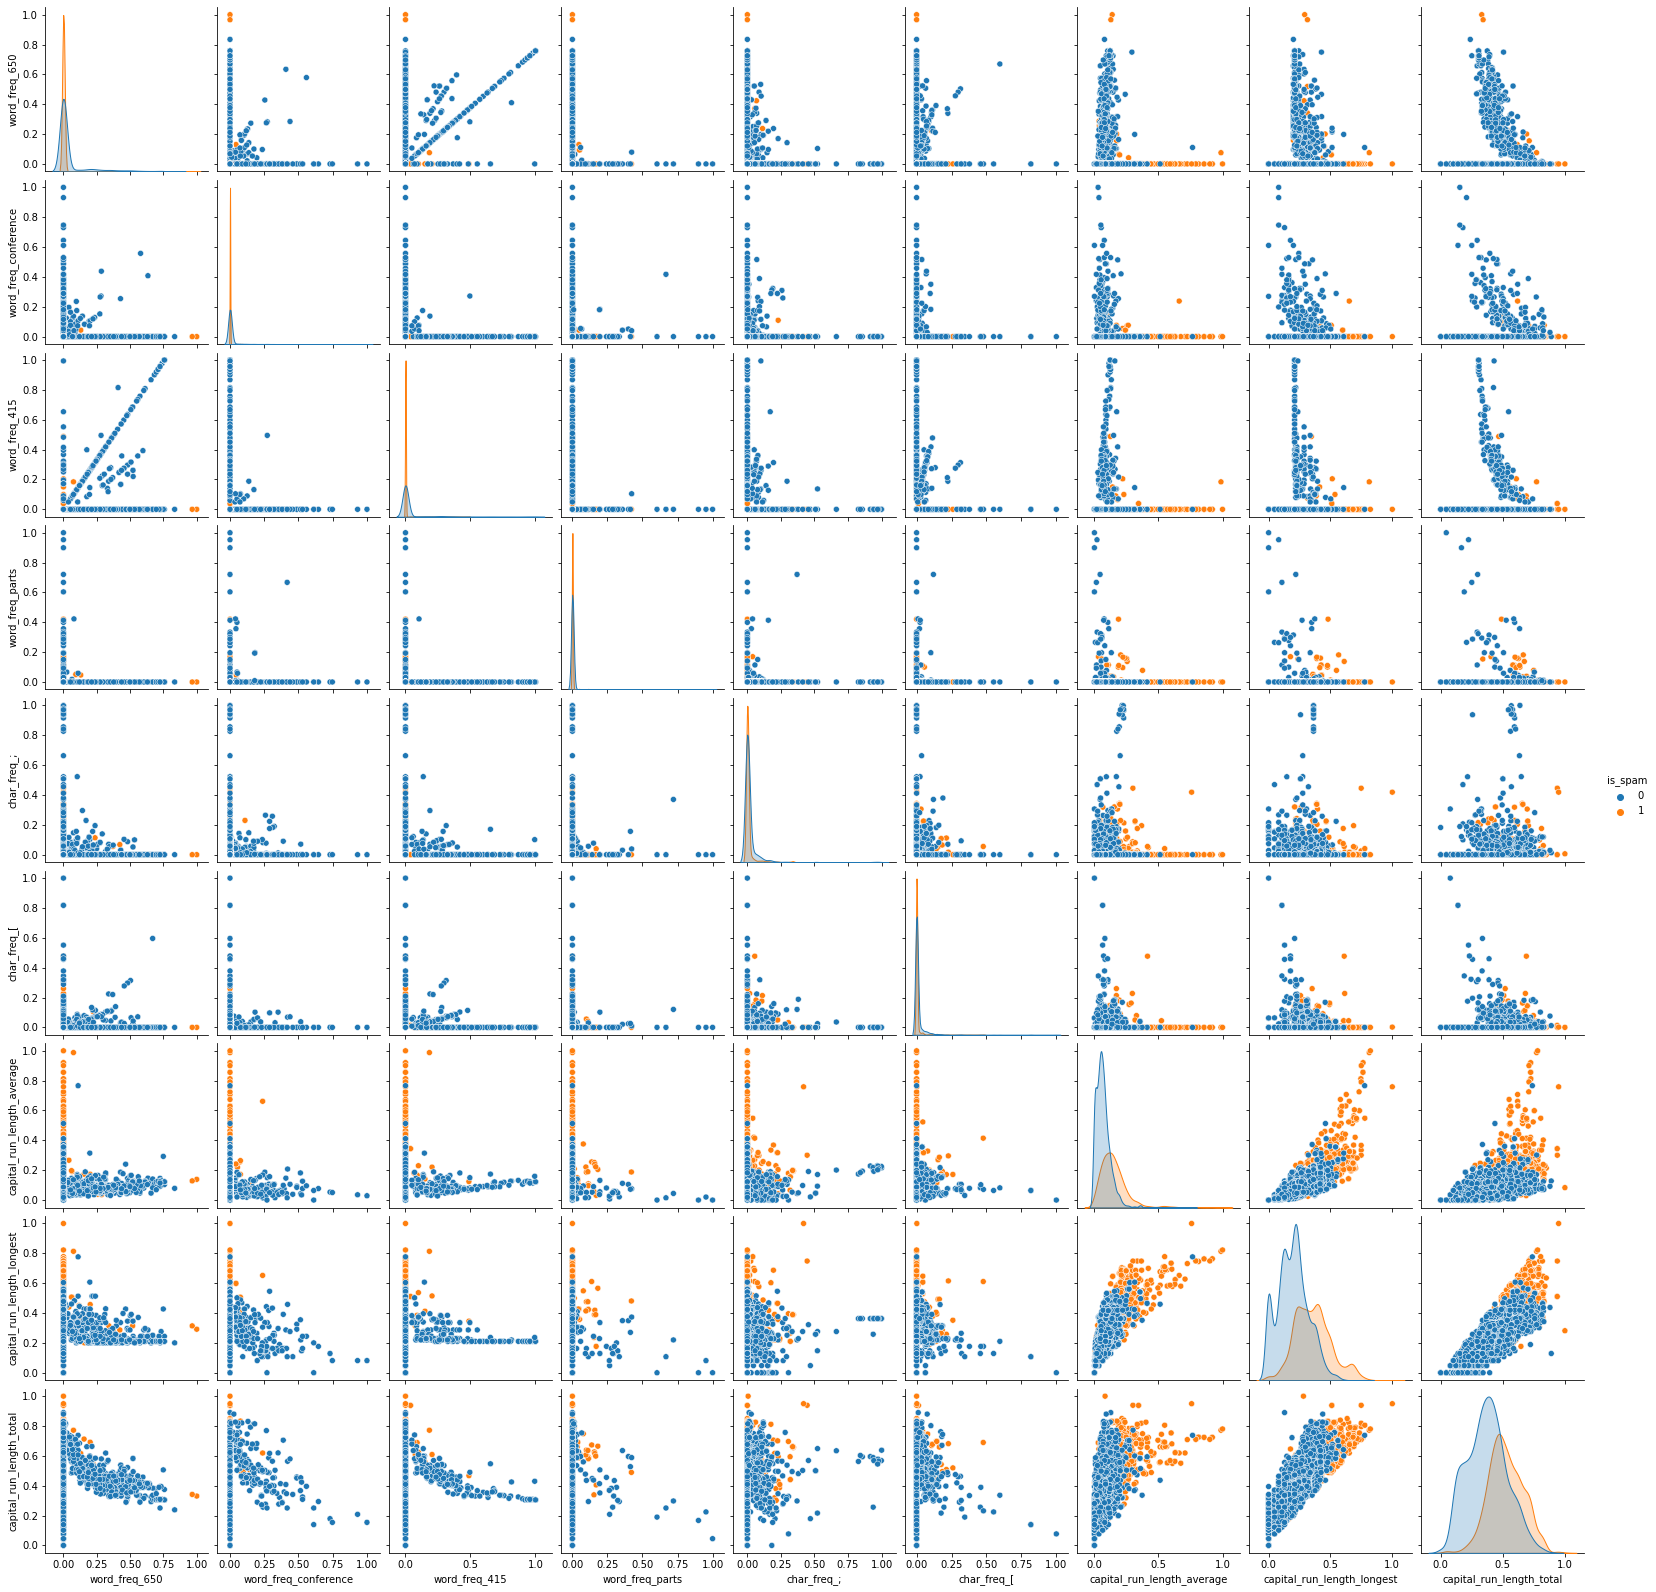

In [23]:
# visualizing dependencies
columns_for_plot = random.choices(column_names[:48], k=4) # random words
columns_for_plot += random.choices(column_names[48:54], k=2) # random characters
columns_for_plot += column_names[54:] # add last unique attributes 
seaborn.pairplot(data_normalized[columns_for_plot], hue='is_spam')
plt.show()

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0) # test_size defaults to 0.25

### kNN

In [25]:
models = []
for k in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, Y_train)
    models.append(model)

In [26]:
for k in range(1, 26):
    res = models[k-1].predict(X_test)
    tn, fp, fn, tp = confusion_matrix(res, Y_test).ravel()
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    acc = (tp + tn) / (tp + tn + fp + fn)
    print(f'k={k:02d}, prec={prec:0.4f}, rec={rec:0.4f}, acc={acc:0.4f}')

k=01, prec=0.7435, rec=0.7862, acc=0.8167
k=02, prec=0.5717, rec=0.8457, acc=0.7871
k=03, prec=0.7196, rec=0.7680, acc=0.8010
k=04, prec=0.6391, rec=0.8212, acc=0.8002
k=05, prec=0.7261, rec=0.7915, acc=0.8141
k=06, prec=0.6478, rec=0.8466, acc=0.8123
k=07, prec=0.7304, rec=0.7962, acc=0.8175
k=08, prec=0.6565, rec=0.8118, acc=0.8019
k=09, prec=0.7065, rec=0.7701, acc=0.7984
k=10, prec=0.6370, rec=0.7898, acc=0.7871
k=11, prec=0.6717, rec=0.7555, acc=0.7819
k=12, prec=0.6217, rec=0.7709, acc=0.7750
k=13, prec=0.6696, rec=0.7643, acc=0.7854
k=14, prec=0.6391, rec=0.7840, acc=0.7854
k=15, prec=0.6891, rec=0.7566, acc=0.7871
k=16, prec=0.6326, rec=0.7638, acc=0.7750
k=17, prec=0.6696, rec=0.7568, acc=0.7819
k=18, prec=0.6304, rec=0.7572, acc=0.7715
k=19, prec=0.6500, rec=0.7293, acc=0.7637
k=20, prec=0.6174, rec=0.7553, acc=0.7672
k=21, prec=0.6587, rec=0.7519, acc=0.7767
k=22, prec=0.6174, rec=0.7533, acc=0.7663
k=23, prec=0.6435, rec=0.7309, acc=0.7628
k=24, prec=0.6217, rec=0.7467, acc

### SVM

In [ ]:
# constructing classifier params
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
Cs = [1e-2, 1e-1, 1, 1e1, 1e2]
gammas = [1e-1, 1, 1e1]
params = []
for k in kernels:
    for c in Cs:
        if k == 'linear':
            params.append((k, c, 1))
            continue
        for g in gammas:
            params.append((k, c, g))

for p in params:
    model = SVC(kernel=p[0], C=p[1], gamma=p[2])
    model.fit(X_train, Y_train)
    res = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(res, Y_test).ravel()
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    acc = (tp + tn) / (tp + tn + fp + fn)
    print(f'kernel={p[0]:7s}, C={p[1]:0.2f}, gamma={p[2]:0.1f}, prec={prec:0.4f}, rec={rec:0.4f}, acc={acc:0.4f}')

kernel=linear , C=0.01, gamma=1.0, prec=0.8370, rec=0.8933, acc=0.8949
kernel=linear , C=0.10, gamma=1.0, prec=0.8609, rec=0.9000, acc=0.9062


### Conclusion

* kNN works better with small k.
* SVM is better with linear kernel
* SVM shows much better results (metrics' difference is about 0.15 in average), although it works slower. But it is hard to discuss time as the used dataset is relatively small.